List only the BITS (Name) of active contributors in this assignment:

1. Name: Reddy Balaji .C (BITS ID: 2023AC05862); Email: 2023ac05862@wilp.bits-pilani.ac.in

    Contribution- 100%

4. Name: Saurabh Jalendra (BITS ID: 2023AC05912); Email: 2023ac05912@wilp.bits-pilani.ac.in

   Contribution- 100%

6. Name: Tushar Shandilya (BITS ID: 2023AC05573); Email: 2023ac05573@wilp.bits-pilani.ac.in

   Contribution- 100%

8. Name:  Tangirala Venkat Aditya (BITS ID: 2023AC05307 ); Email: 2023ac05307@wilp.bits-pilani.ac.in

   Contribution- 100%

10. Name: Monica Malik (BITS ID: 2023AC05875); Email: 2023ac05875@wilp.bits-pilani.ac.in

    Contribution- 100%

# Importing Libraries

In [37]:
import math
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


"math" library is used for performing the basic mathematical functions like square roots,exponentiation, rounding function etc which may be needed in data analysis.
"pandas" library is used for data manipulation and analysis, mainly used to read, write, and manipulate tabular data structures such as DataFrames which provides functions for handling missing data, merging datasets, grouping, and performing transformations.
"numpy" provides support for multi-dimensional arrays with a collection of mathematical functions to operate on these arrays efficiently.
"scipy.stats" module offers a variety of statistical functions where randit and uniform distributions are useful for generating random numbers in hyperparameter tuning particularly in RandomizedSearchCV for random sampling of parameters.
"matplotlib.pyplot" is a plotting library used for creating data visualizations in Python mainly useful for plotting histograms, scatter plots, bar charts, etc., to visualize data distributions and relationships.
"seaborn" is a higher-level data visualization library built on top of matplotlib helps in creating informative statistical graphics, such as heatmaps, box plots etc.
"chi2_contingency" is used for the Chi-squared test which assess the association between two categorical variables and also used in statistical tests for independence in contingency tables.
"StandardScaler" submodule of sklearn.preprocessing standardizes features by removing the mean and scaling them to unit variance, which is essential for machine learning algorithms like Logistic Regression and Decision Trees that rely on feature scaling.
"LabelEncoder" submodule of sklearn.preprocessing  is used to convert categorical labels into numerical values, which is necessary when working with machine learning models that require numerical input, like Decision Trees and Logistic Regression.
"RandomizedSearchCV" submodule of sklearn.preprocessing performs random hyperparameter search, which is computationally less expensive than grid search, allowing for efficient tuning of hyperparameters for models like Decision Trees and Logistic Regression.
"DecisionTreeClassifier" submodule of sklearn.linear_model is a machine learning model that is used for classification tasks.
"LogisticRegression" submodule of sklearn.linear_model is a linear model used for binary classification problems
"train_test_split" submodule of sklearn.model_selection is used to split the dataset into training and testing sets.
precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix which are submodules of sklearn.metrics are used for evaluating the performance of the classification models.
"ConfusionMatrixDisplay" submodule of sklearn.metrics helps in visualizing the confusion matrix, which is useful to understand the performance of a classification model and where it may be making incorrect predictions.

# 2.a - Printing 2 rows for sanity check

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_risk_prediction_dataset.csv')
df.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive


# 2.b - Appropriate Data Visualization

In [6]:
columns_list = df.columns.tolist()
print(columns_list)

['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


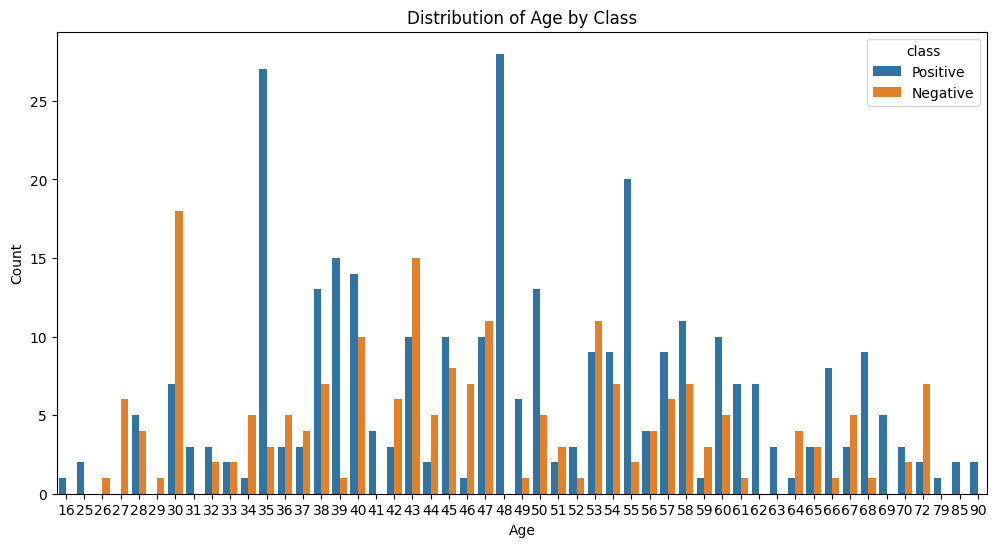

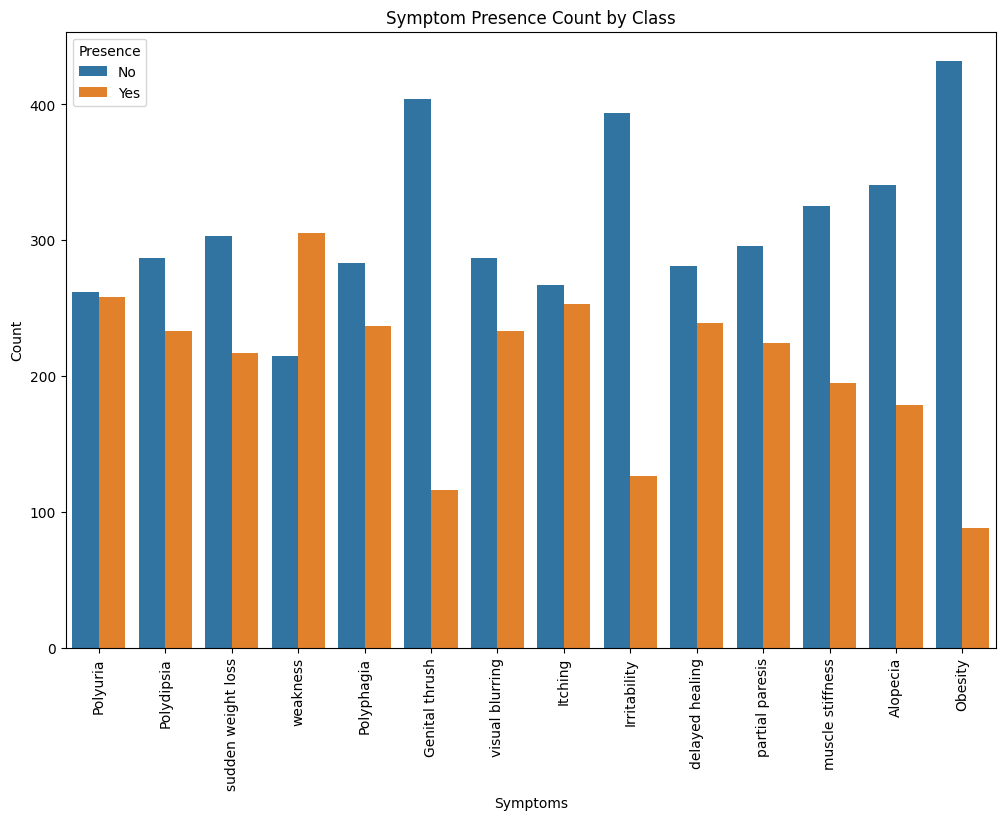

In [7]:
# Assuming 'df' is the dataset and it has been loaded properly
# Plotting 'Age' separately with increased width to emphasize it more
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='class', data=df)
plt.title('Distribution of Age by Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualizing the count of different symptoms (Polyuria, Polydipsia, etc.)
# Melt the dataset to visualize all symptoms' presence in one plot
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
            'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
            'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

# Melt the DataFrame to get a long-form version for plotting
df_melted = df.melt(id_vars='class', value_vars=symptoms,
                    var_name='Symptoms', value_name='Presence')

# Plot the count of symptoms with class as hue
plt.figure(figsize=(12, 8))
sns.countplot(x='Symptoms', hue='Presence', data=df_melted)
plt.xticks(rotation=90)
plt.title('Symptom Presence Count by Class')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.show()

# 2.b correlational analysis on the dataset and visualization for the same.

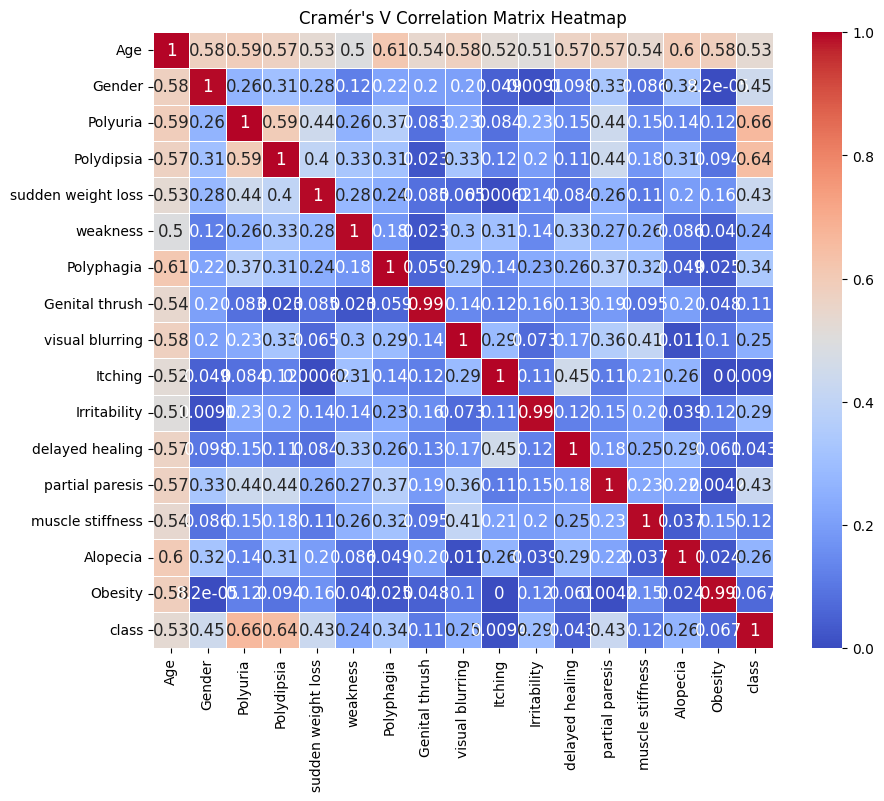

In [8]:
#  Calculate Correlation using Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Create a correlation matrix for all categorical columns
columns = df.columns
correlation_matrix = pd.DataFrame(index=columns, columns=columns)
for col1 in columns:
    for col2 in columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert the correlation matrix to numeric
correlation_matrix = correlation_matrix.astype(float)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,annot_kws={"size": 12}, cmap='coolwarm', linewidths=0.5)
plt.title('Cramér\'s V Correlation Matrix Heatmap')
plt.show()

**Justification for correlational analysis on the data set:**
Yes, based on the provided Cramér's V correlation matrix heatmap, the correlational analysis will affect the feature selection process in identifying the strong predictors, identifying redundant information, handing multicollinearity, Focus on independent features.

The heatmap shows that certain pairs of features, such as Polyuria and Polydipsia, exhibit relatively strong correlations (darker red).
Target variable (class) shows moderate correlations with features which implies these feature provide more informative and should be likely be retained during feature selection as they contribute to predicting the target.
Some pairs of features are more correlated than others, which is represented by darker red cells (closer to 1).Features that show weak correlations with others (mostly blue areas) are likely providing independent information. These features should be carefully evaluated as they can contribute unique information, which is beneficial for model performance.

**Summary:** Looking at the heat map, we do not see any two columns are highly correlated (very close to 1) with each other. This helps us in determining later in the feature engineering process that we do not need to drop or merge any columns.

# 3. Data Pre-processing and cleaning

## 3.a.i - Identifying and visualizing null or missing values

In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


## Chart above shows there are no missing values.

## 3.a.ii - Identifying outliers

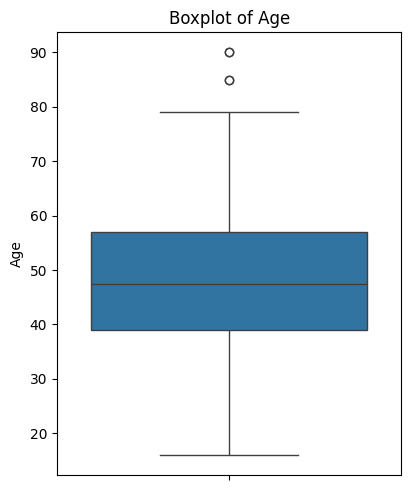

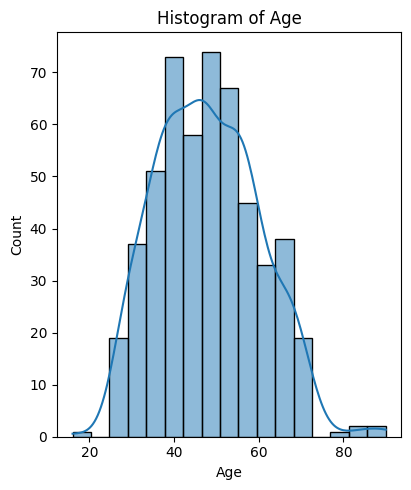

In [10]:
# Boxplots
num_columns = len(df.select_dtypes(include=['float64', 'int64']).columns)
n_cols = 4
n_rows = math.ceil(num_columns / n_cols)

plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
# Compute IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Display results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("\nOutliers:")
print(outliers)


Q1 (25th percentile): 39.0
Q3 (75th percentile): 57.0
IQR: 18.0
Lower Bound: 12.0
Upper Bound: 84.0

Outliers:
     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
101   85    Male      Yes        Yes                Yes      Yes        Yes   
102   90  Female       No        Yes                Yes       No         No   
185   85    Male      Yes        Yes                Yes      Yes        Yes   
186   90  Female       No        Yes                Yes       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
101            Yes             Yes     Yes           No             Yes   
102            Yes             Yes     Yes           No              No   
185            Yes             Yes     Yes           No             Yes   
186            Yes             Yes     Yes           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class  
101             Yes              Yes       No      

In [12]:
from scipy.stats.mstats import winsorize

# Winsorize the 'age' column
#df['age_winsorized'] = winsorize(df['Age'], limits=[0.05, 0.05])

# Apply a logarithmic transformation
#df['age_log'] = np.log(df['Age'] + 1)  # Adding 1 to avoid log(0)
# Replace outliers with the median value of the non-outlier data
#median_age = df['Age'][(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)].median()
#df['age_imputed'] = np.where((df['Age'] < lower_bound) | (df['Age'] > upper_bound), median_age, df['Age'])
# Cap the 'age' column values at the upper and lower bounds
df['age_capped'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])
df['age_capped'] = np.where(df['Age'] < lower_bound, lower_bound, df['age_capped'])
# Bin the 'age' column into categories
#bins = [0, 30, 50, 70, 90, np.inf]
#labels = ['0-15', '15-30', '30-45', '45-60', '60-85','85+']
#df['age_binned'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df['age_capped'].min())
print(df['age_capped'].max())


16.0
84.0


In [13]:
skewness = df['Age'].skew()
print(f'Skewness: {skewness}')

Skewness: 0.3293593578272701


In [14]:
#Finding Skewness
skewness = df['age_capped'].skew()
print(f'Skewness: {skewness}')

Skewness: 0.27405879005985334


From the output of above two cells, we have reduced the skewness of dataset by handling the outliers.

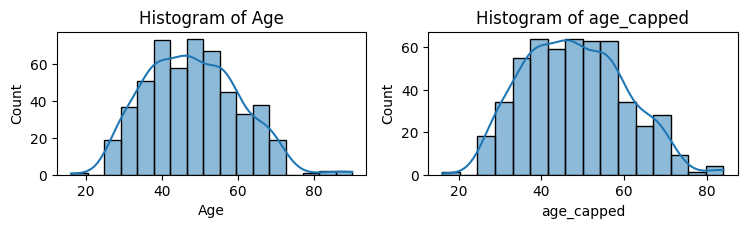

In [15]:
plt.figure(figsize=(15, 10))

# Plot a histogram for each column
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(5, 4, i)  # Adjust the layout based on the number of columns
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

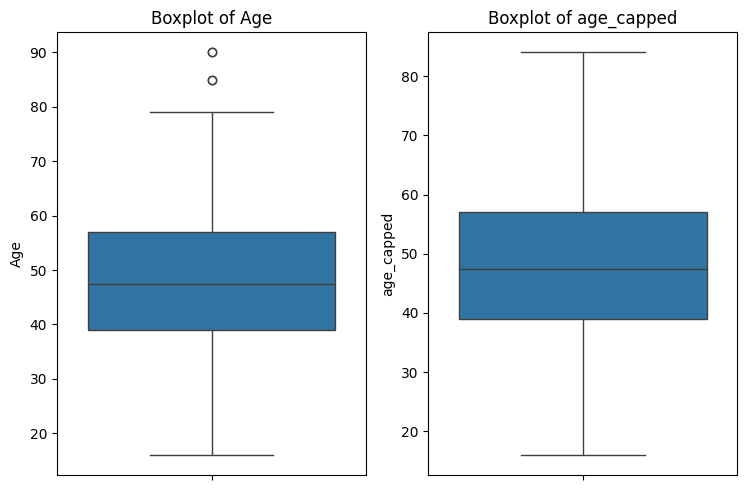

In [16]:
num_columns = len(df.select_dtypes(include=['float64', 'int64']).columns)
n_cols = 4
n_rows = math.ceil(num_columns / n_cols)

plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Preprocessing steps which are performed in 3(a) were:
* Identification of outliers.   
* Handling of outliers
* Correcting skewness






# 3.b. Applying appropriate feature engineering techniques

In [17]:
# Initialize the StandardScaler,this will standardize the only numeric column-Age
scaler = StandardScaler()
numeric_col = ['age_capped']
categorical_cols= [col for col in df.columns if df[col].dtype == 'object']
# Fit and transform the data
df[numeric_col] = scaler.fit_transform(df[numeric_col])

df_standardized = pd.concat([df[categorical_cols], df[numeric_col]], axis=1)
df_standardized.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_capped
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,-0.663850
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,0.829454
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,-0.580889
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,-0.249044
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0.995377


In [18]:
#Label encoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column,to convert its values to numerical form
for col in categorical_cols:
    df_standardized[col] = label_encoder.fit_transform(df_standardized[col])

# Display the transformed DataFrame
df_standardized.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_capped
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,-0.663850
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0.829454
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,-0.580889
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,-0.249044
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0.995377


In [19]:
df_standardized.isnull().sum()

,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0
Irritability,0


**Justification for**
Standardization: The StandardScaler is used here to standardize the numeric column age_capped. Standardization involves scaling the features so they have a mean of 0 and a standard deviation of 1. This technique is essential for many machine learning algorithms, particularly those that assume normally distributed data (e.g., linear regression, logistic regression, support vector machines). It ensures that the scale of the numeric features does not disproportionately affect the performance of the model.

Only age_capped is being standardized because it's the only numeric column in this specific context. Numeric features are generally standardized to bring them to a common scale.

**Concatenation**: After standardizing the numeric columns, the code concatenates them back with the categorical columns to form a single DataFrame (df_standardized). This step is necessary to ensure that the transformed DataFrame includes all the features required for subsequent modeling or analysis.

**Label Encoding**: The LabelEncoder is applied to each categorical column to convert categorical values into numerical format. This is a prerequisite for many machine learning algorithms that require numeric input. Label encoding assigns a unique integer to each unique categorical value.
Reason for Categorical Columns: This step transforms the categorical data, allowing algorithms that do not natively handle categorical data to process these features. It is important when working with models that require numeric input for both training and prediction.

**Standardization**: Applied to numeric columns to ensure that they are on the same scale, improving the performance and stability of machine learning models.
**Label Encoding**: Applied to categorical columns to convert non-numeric data into a format suitable for machine learning algorithms.

# 4. Model Building

## 4.a Spliting the dataset into training and test sets 80/20 ratio

In [20]:
#train test split in 80 and 20%

# Separate features and target
X = df_standardized.drop('class', axis=1)  # Features (independent variables)
y = df_standardized['class']               # Target (dependent variable)

# Split the data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_70_30, X_test_70_30, y_train_70_30, y_test_70_30 = train_test_split(X, y, test_size=0.3, random_state=42)


## 4.b Building Model based on Training and Test Data using hyper parameter tuning

In [23]:

# Decision Tree
dt = DecisionTreeClassifier()

# Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Parameter grid for Decision Tree
param_dt = {
    'max_depth': randint(3,20),
    'min_samples_split': randint(2,20),
    'min_samples_leaf': randint(1,20),
    'max_features':[None, 'sqrt', 'log2', 0.5],
    #'criterion':['gini', 'entropy']
}

# Parameter grid for Logistic Regression
param_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    #'penalty': ['l2', ],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter':[100, 200, 300, 400],
    'class_weight':[None, 'balanced', {0: 0.5, 1: 1.5}]
}

#create Randomized search cv
random_search_dt= RandomizedSearchCV(estimator= dt,
                                  param_distributions=param_dt,
                                  scoring='accuracy',
                                  cv=5,
                                  n_iter=10,
                                  verbose=3)

random_search_lr= RandomizedSearchCV(estimator= lr,
                                  param_distributions=param_lr,
                                  scoring='accuracy',
                                  cv=5,
                                  n_iter=10,
                                  verbose=3)
#create Randomized search cv
random_search_dt_70_30= RandomizedSearchCV(estimator= dt,
                                  param_distributions=param_dt,
                                  scoring='accuracy',
                                  cv=5,
                                  n_iter=10,
                                  verbose=3)

random_search_lr_70_30= RandomizedSearchCV(estimator= lr,
                                  param_distributions=param_lr,
                                  scoring='accuracy',
                                  cv=5,
                                  n_iter=10,
                                  verbose=3)

# calculation for 80/20 train test data
random_search_dt.fit(X_train,y_train)
best_params_dt= random_search_dt.best_params_
best_model_dt=random_search_dt.best_estimator_

best_model_dt.fit(X_train,y_train)
y_pred_dt=best_model_dt.predict(X_test)

print('*'*50)
random_search_lr.fit(X_train,y_train)
best_params_lr= random_search_lr.best_params_
best_model_lr=random_search_lr.best_estimator_

best_model_lr.fit(X_train,y_train)
y_pred_lr=best_model_lr.predict(X_test)

# Calculation for 70/30 train test data
random_search_dt_70_30.fit(X_train_70_30,y_train_70_30)
best_params_dt_70_30= random_search_dt_70_30.best_params_
best_model_dt_70_30=random_search_dt_70_30.best_estimator_

best_model_dt_70_30.fit(X_train_70_30,y_train_70_30)
y_pred_dt_70_30=best_model_dt_70_30.predict(X_test_70_30)

print('*'*50)
random_search_lr_70_30.fit(X_train_70_30,y_train_70_30)
best_params_lr_70_30= random_search_lr_70_30.best_params_
best_model_lr_70_30=random_search_lr_70_30.best_estimator_

best_model_lr_70_30.fit(X_train_70_30,y_train_70_30)
y_pred_lr_70_30=best_model_lr_70_30.predict(X_test_70_30)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=11;, score=0.821 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=11;, score=0.904 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=11;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=11;, score=0.831 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=11;, score=0.892 total time=   0.0s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=7;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=7;, score=0.867 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=7;, score=0.892 t

# Feature Importances

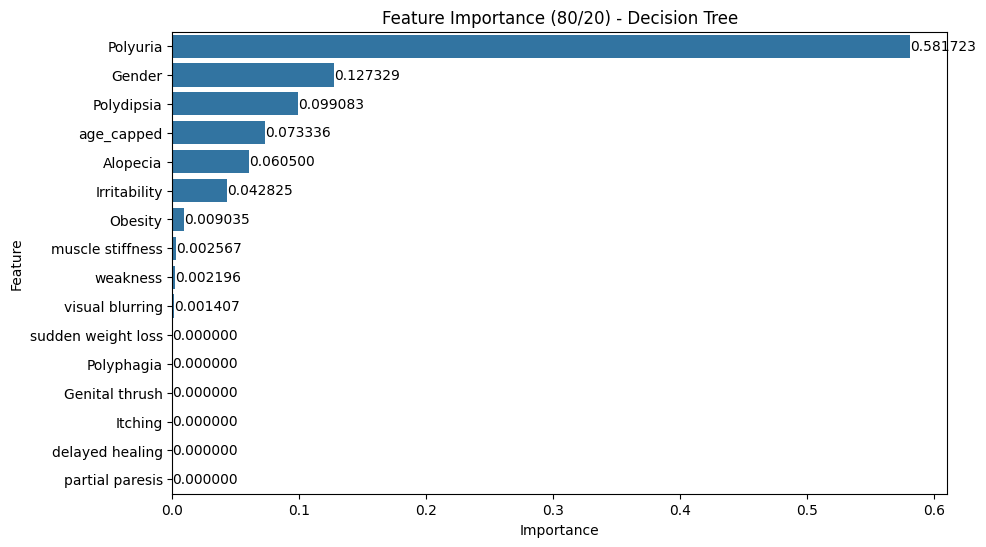

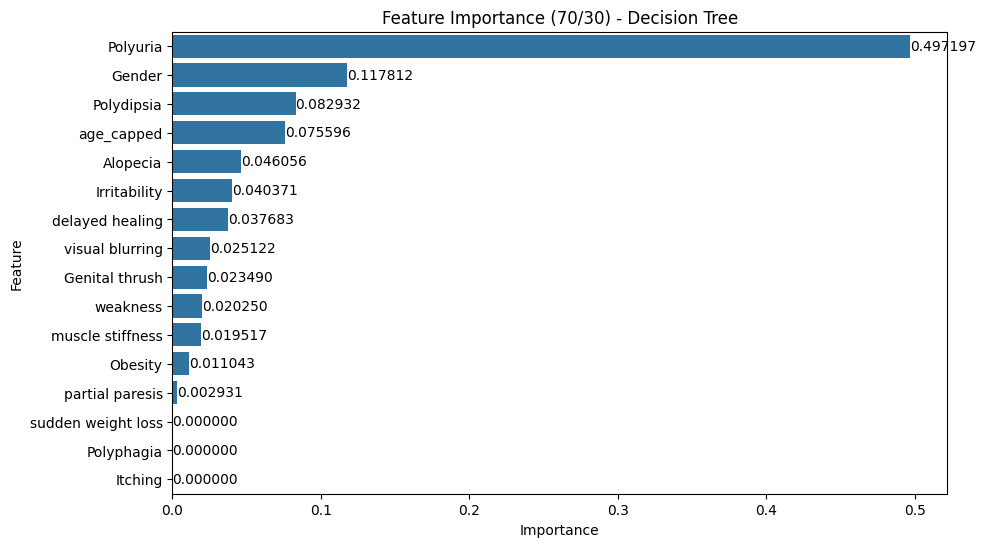

In [27]:
import seaborn as sns
importances=  best_model_dt.feature_importances_

#create a dataframe for plotting for 80/20
features= X_train.columns
importance_df= pd.DataFrame({
    'Feature':features,
    'Importance':importances})

#Sort the dataframe by importance
importance_df= importance_df.sort_values(by='Importance',ascending=False)

#plotting
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Importance',y='Feature',data= importance_df)

#add text annotations
for index, value in enumerate(importance_df['Importance']):
    ax.text(value,index,f'{value:4f}',va='center')

plt.title("Feature Importance (80/20) - Decision Tree")
plt.show()

#create a dataframe for plotting for 70/30
importances_70_30=  best_model_dt_70_30.feature_importances_
features_70_30= X_train_70_30.columns
importance_df_70_30= pd.DataFrame({
    'Feature':features_70_30,
    'Importance':importances_70_30})

#Sort the dataframe by importance
importance_df_70_30= importance_df_70_30.sort_values(by='Importance',ascending=False)

#plotting
plt.figure(figsize=(10,6))
ax_70_30=sns.barplot(x='Importance',y='Feature',data= importance_df_70_30)

#add text annotations
for index, value in enumerate(importance_df_70_30['Importance']):
    ax_70_30.text(value,index,f'{value:4f}',va='center')

plt.title("Feature Importance (70/30) - Decision Tree")
plt.show()

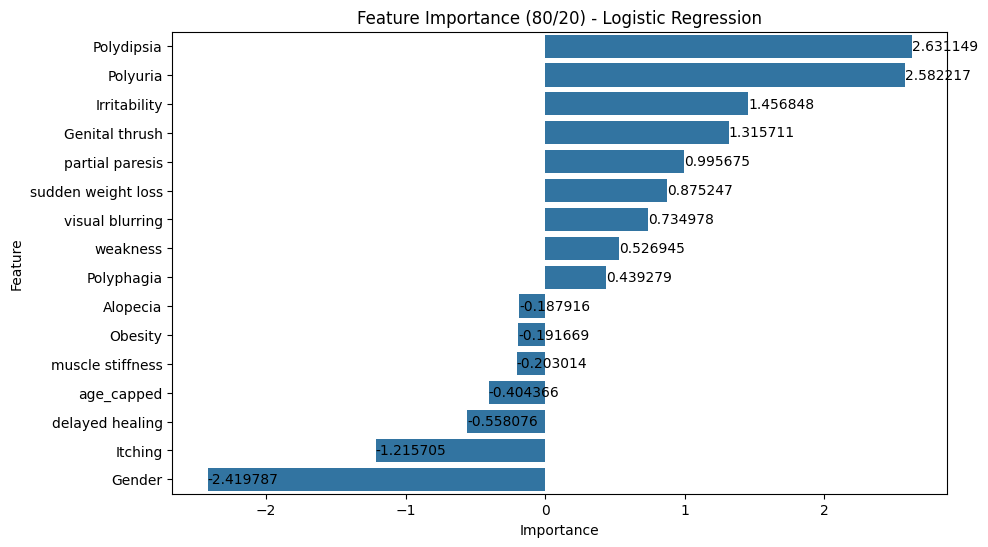

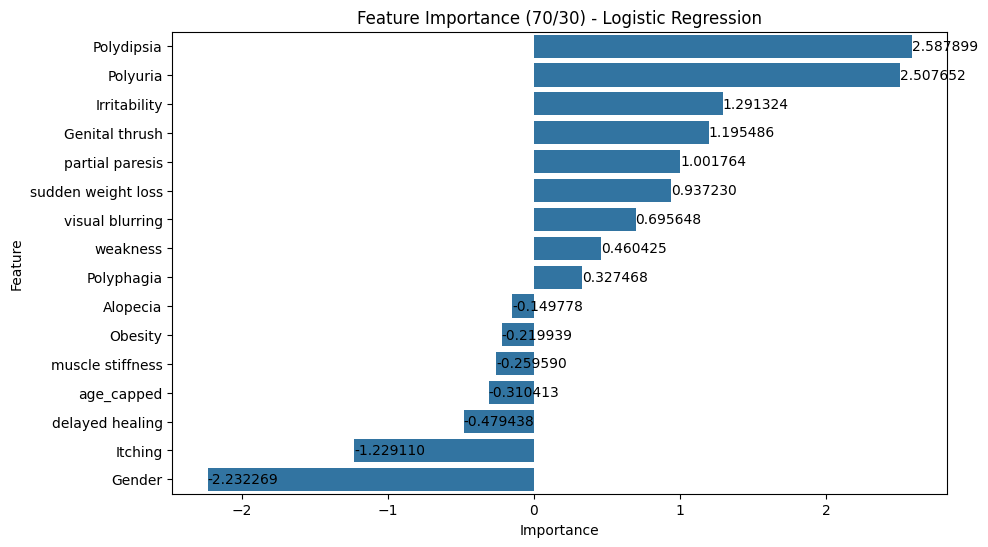

In [28]:
# For 80/20
importances=  best_model_lr.coef_[0]

#create a dataframe for plotting
features= X_train.columns
importance_df= pd.DataFrame({
    'Feature':features,
    'Importance':importances})

#Sort the dataframe by importance
importance_df= importance_df.sort_values(by='Importance',ascending=False)

#plotting
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Importance',y='Feature',data= importance_df)

#add text annotations
for index, value in enumerate(importance_df['Importance']):
    ax.text(value,index,f'{value:4f}',va='center')

plt.title("Feature Importance (80/20) - Logistic Regression")
plt.show()

# For 70/30
importances_70_30=  best_model_lr_70_30.coef_[0]

#create a dataframe for plotting
features_70_30= X_train_70_30.columns
importance_df_70_30= pd.DataFrame({
    'Feature':features_70_30,
    'Importance':importances_70_30})

#Sort the dataframe by importance
importance_df_70_30= importance_df_70_30.sort_values(by='Importance',ascending=False)

#plotting
plt.figure(figsize=(10,6))
ax_70_30=sns.barplot(x='Importance',y='Feature',data= importance_df_70_30)

#add text annotations
for index, value in enumerate(importance_df_70_30['Importance']):
    ax_70_30.text(value,index,f'{value:4f}',va='center')

plt.title("Feature Importance (70/30) - Logistic Regression")
plt.show()

## 5.a Comparing the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.

In [30]:
#model evaluation
#writing function for accuracy metrics
def print_classification_metrics(y_test, y_pred):
    """
    Prints precision, recall, F1-score, and accuracy of the classification model.

    Parameters:
    y_true: array-like of shape (n_samples,)
        True labels of the test set.

    y_pred: array-like of shape (n_samples,)
        Predicted labels by the model.
    """
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

    disp= ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(include_values=True, cmap='viridis',ax=None, xticks_rotation='horizontal')
    #add text annotations
    plt.text(0.,0.2,'True Negative',fontsize=12, color='white',ha='center',va='center')
    plt.text(1.0,0.2,'False Positive',fontsize=12, color='white',ha='center',va='center')
    plt.text(0.0,1.2,'False Negative',fontsize=12, color='white',ha='center',va='center')
    plt.text(1.0,1.2,'True Positive',fontsize=12, color='white',ha='center',va='center')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Test_Confusion_Matrix")
    plt.show()


Decision tree accuracy for (80/20) is as follows:
Precision: 0.9688
Recall: 0.8732
F1-Score: 0.9185
Accuracy: 0.8942

Confusion Matrix:
 [[31  2]
 [ 9 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.97      0.87      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.91      0.88       104
weighted avg       0.91      0.89      0.90       104



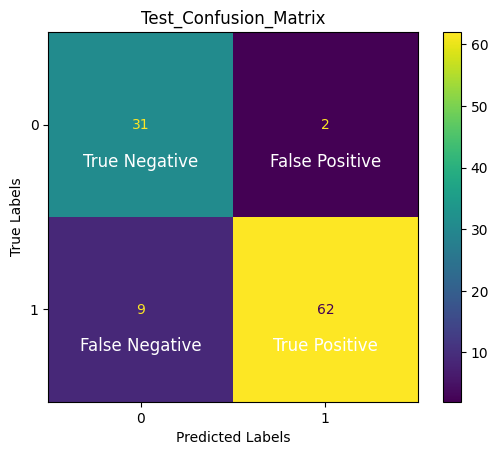

Logistic model accuracy for (80/20) is as follows:
Precision: 0.9315
Recall: 0.9577
F1-Score: 0.9444
Accuracy: 0.9231

Confusion Matrix:
 [[28  5]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



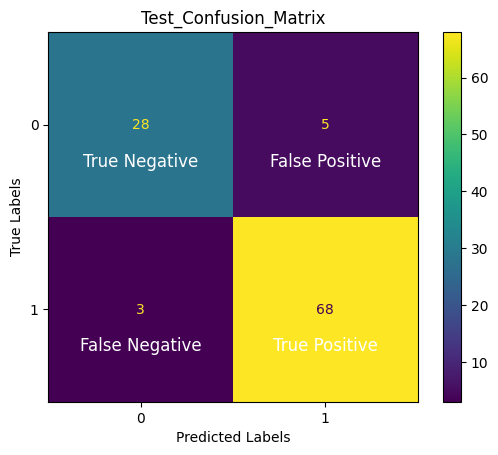

----------------------------------------
Decision tree accuracy for (70/30) is as follows:
Precision: 0.9899
Recall: 0.9608
F1-Score: 0.9751
Accuracy: 0.9679

Confusion Matrix:
 [[53  1]
 [ 4 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.99      0.96      0.98       102

    accuracy                           0.97       156
   macro avg       0.96      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



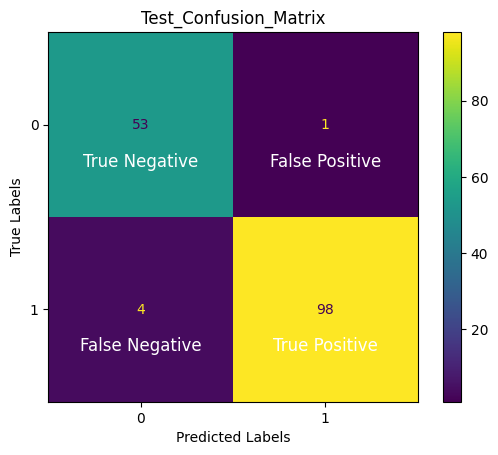

Logistic model accuracy for (70/30) is as follows:
Precision: 0.9604
Recall: 0.9510
F1-Score: 0.9557
Accuracy: 0.9423

Confusion Matrix:
 [[50  4]
 [ 5 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.96      0.95      0.96       102

    accuracy                           0.94       156
   macro avg       0.93      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156



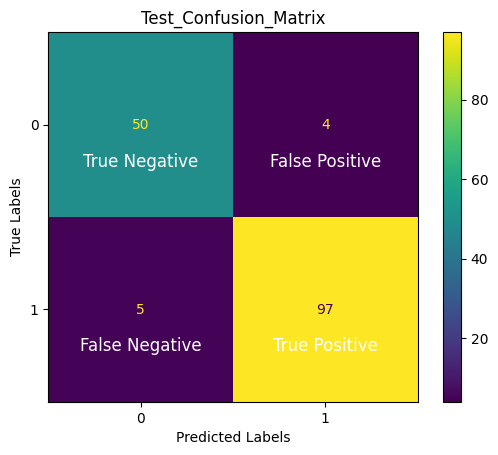

In [33]:
# Example usage:
# Assuming y_test and y_pred are defined
print("Decision tree accuracy for (80/20) is as follows:",)
print_classification_metrics(y_test, y_pred_dt)
print("Logistic model accuracy for (80/20) is as follows:",)
print_classification_metrics(y_test, y_pred_lr)
print("----------------------------------------")
print("Decision tree accuracy for (70/30) is as follows:",)
print_classification_metrics(y_test_70_30, y_pred_dt_70_30)
print("Logistic model accuracy for (70/30) is as follows:",)
print_classification_metrics(y_test_70_30, y_pred_lr_70_30)


**Justification:** Before hyper parameter tuning, analyzing the accuracy metrics of both models for this data set, it is evident that the Logistic Model
 demonstrates higher accuracy compared to the Decision Tree model for 80/20 split and for 70/30 split we see that  Decision Tree model demonstrates higher accuracy compared to the Logistic Model.
This conclusion is based on a comprehensive evaluation using various accuracy metrics, including precision, recall, the classification report, the confusion matrix, and the F1 score for 80/20 and 70/30 splits.

## 5.b Justification for choosing decision tree model

In [36]:
from sklearn.model_selection import cross_val_score
# Cross-validation for Logistic Regression (80/20)
cv_scores_logreg = cross_val_score(best_model_dt, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy for Logistic Regression (80/20): {cv_scores_logreg.mean()}")

# Cross-validation for Decision Tree (80/20)
cv_scores_tree = cross_val_score(best_model_lr, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy for Decision Tree (80/20): {cv_scores_tree.mean()}")

# Cross-validation for Logistic Regression (70/30)
cv_scores_logreg_70_30 = cross_val_score(best_model_dt_70_30, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy for Logistic Regression (70/30): {cv_scores_logreg_70_30.mean()}")

# Cross-validation for Decision Tree (70/30)
cv_scores_tree_70_30 = cross_val_score(best_model_lr_70_30, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy for Decision Tree (70/30): {cv_scores_tree_70_30.mean()}")

Cross-validated accuracy for Logistic Regression (80/20): 0.8942307692307692
Cross-validated accuracy for Decision Tree (80/20): 0.9288461538461539
Cross-validated accuracy for Logistic Regression (70/30): 0.948076923076923
Cross-validated accuracy for Decision Tree (70/30): 0.9211538461538462


**Justification:** After hyper parameter tuning and analyzing the accuracy metrics of both models for this data set, it is evident that the Decision Tree model demonstrates higher accuracy compared to the Logistic Regression model for 80/20 split and for 70/30 split we see that
Logistic Model demonstrates higher accuracy compared to the Decision Tree model.
This conclusion is based on a comprehensive evaluation using various accuracy metrics, including precision, recall, the classification report, the confusion matrix, and the F1 score for 80/20 and 70/30 splits.

# Assignment part 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## 1. Model building of KNN, Naive Bayisian, RandomForest and AdaBoost

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Make predictions
y_pred_knn = knn.predict(X_test)

knn.fit(X_train, y_train)
# Make predictions
y_pred_knn = knn.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
# Make predictions
y_pred_nb = nb.predict(X_test)

nb.fit(X_train, y_train)
# Make predictions
y_pred_nb = nb.predict(X_test)


rf = RandomForestClassifier()

rf.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf.predict(X_test)

rf.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf.predict(X_test)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
# Make predictions
y_pred_ab = ab.predict(X_test)

## 2. Performance evaluation of each model

KNN Model accuracy is as follows:
Precision: 0.9545
Recall: 0.8873
F1-Score: 0.9197
Accuracy: 0.8942

Confusion Matrix:
 [[30  3]
 [ 8 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.95      0.89      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.90      0.88       104
weighted avg       0.90      0.89      0.90       104



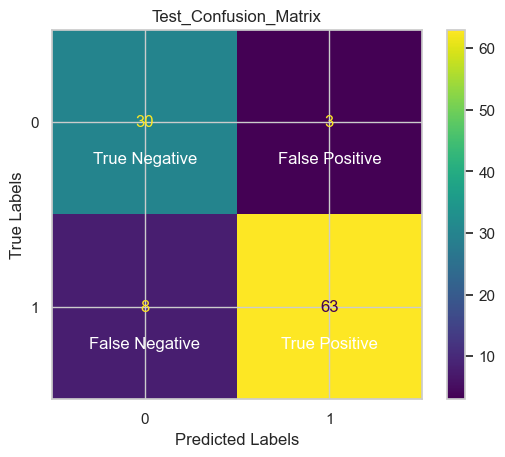

**************************************************
Naive Bayes Model accuracy is as follows:
Precision: 0.9306
Recall: 0.9437
F1-Score: 0.9371
Accuracy: 0.9135

Confusion Matrix:
 [[28  5]
 [ 4 67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



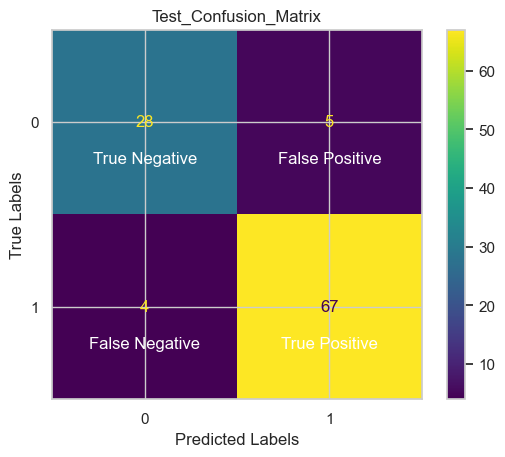

**************************************************
Random forest Model accuracy is as follows:
Precision: 1.0000
Recall: 0.9859
F1-Score: 0.9929
Accuracy: 0.9904

Confusion Matrix:
 [[33  0]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



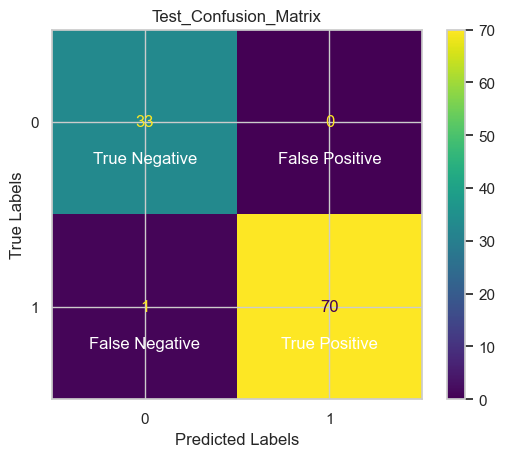

**************************************************
Adaboost Model accuracy is as follows:
Precision: 0.9444
Recall: 0.9577
F1-Score: 0.9510
Accuracy: 0.9327

Confusion Matrix:
 [[29  4]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104



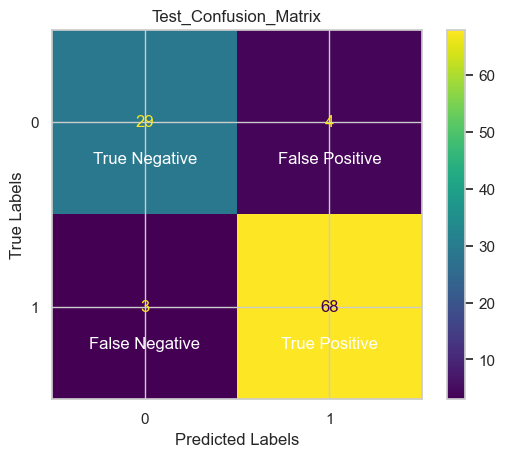

In [ ]:
# Evaluate the model
print("KNN Model accuracy is as follows:",)
print_classification_metrics(y_test,y_pred_knn)

print("*"*50)
print("Naive Bayes Model accuracy is as follows:",)
print_classification_metrics(y_test,y_pred_nb)

print("*"*50)
print("Random forest Model accuracy is as follows:",)
print_classification_metrics(y_test,y_pred_rf)

print("*"*50)
print("Adaboost Model accuracy is as follows:",)
print_classification_metrics(y_test,y_pred_ab)

**Justification for performance:** After considering accuracy and F1 score values of all models (KNN, Navie Bayes, Random Forest, Adaboost), performance of random forest is considered as the best out of other models.

## 3. Hyperparameter tuning of all model

In [ ]:
#defining KNN parameters
param_dist_knn = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist_knn,
                                        n_iter=10, cv=5, scoring='accuracy',
                                        n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search_knn.fit(X_train, y_train)
# Make predictions
y_pred_knn = random_search_knn.predict(X_test)

#defining Naive bayes parameters
param_dist_nb = {
    'var_smoothing': uniform(1e-9, 1e-3)  # Smoothing parameter to handle zero variance
}

random_search_nb = RandomizedSearchCV(nb, param_distributions=param_dist_nb,
                                       n_iter=10, cv=5, scoring='accuracy',
                                       n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search_nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = random_search_nb.predict(X_test)

#defining random forest parameters
param_dist_rf = {
    #'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    #'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf,
                                       n_iter=10, cv=5, scoring='accuracy',
                                       n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_search_rf.predict(X_test)

#defining adaboost parameters
param_dist_ab = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 1.0)  # Learning rate for the boosting process
}

ab = AdaBoostClassifier()
random_search_ab = RandomizedSearchCV(ab, param_distributions=param_dist_ab,
                                       n_iter=10, cv=5, scoring='accuracy',
                                       n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search_ab.fit(X_train, y_train)

# Make predictions
y_pred_ab = random_search_ab.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


## 4. Evaluation of each model after hyperparametertuning

KNN Model accuracy is as follows:
Precision: 1.0000
Recall: 0.9577
F1-Score: 0.9784
Accuracy: 0.9712

Confusion Matrix:
 [[33  0]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



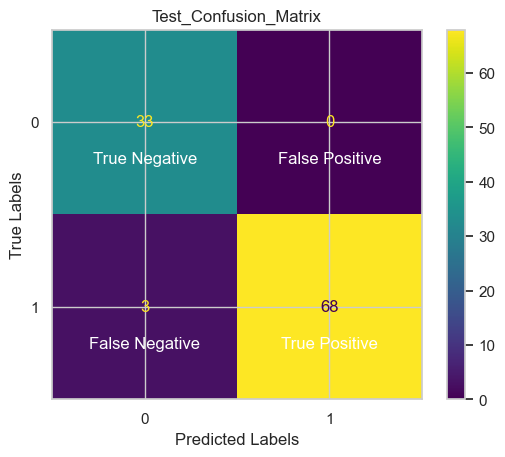

**************************************************
Naive Bayes Model accuracy is as follows:
Precision: 0.9306
Recall: 0.9437
F1-Score: 0.9371
Accuracy: 0.9135

Confusion Matrix:
 [[28  5]
 [ 4 67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



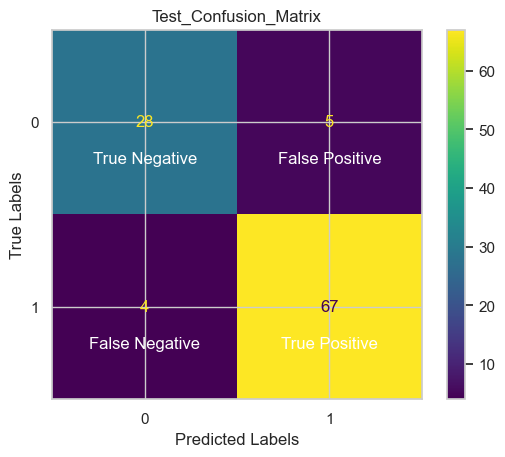

**************************************************
Random forest Model accuracy is as follows:
Precision: 0.9726
Recall: 1.0000
F1-Score: 0.9861
Accuracy: 0.9808

Confusion Matrix:
 [[31  2]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.97      1.00      0.99        71

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



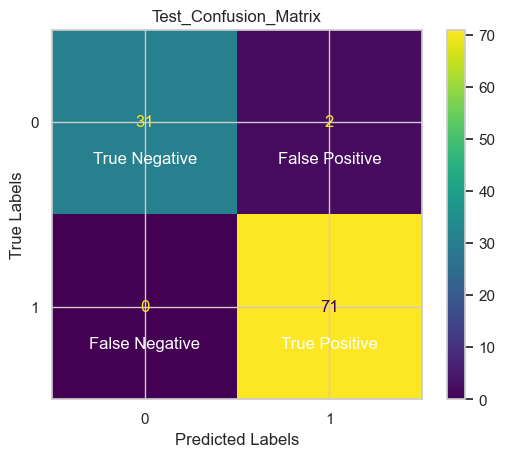

**************************************************
Adaboost Model accuracy is as follows:
Precision: 0.9697
Recall: 0.9014
F1-Score: 0.9343
Accuracy: 0.9135

Confusion Matrix:
 [[31  2]
 [ 7 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.97      0.90      0.93        71

    accuracy                           0.91       104
   macro avg       0.89      0.92      0.90       104
weighted avg       0.92      0.91      0.91       104



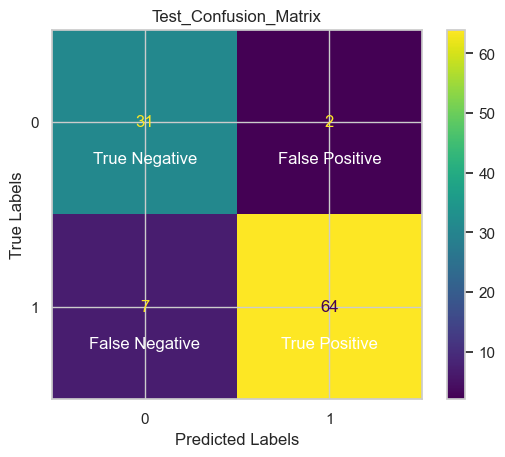

In [ ]:
# Evaluate the model
print("KNN Model accuracy is as follows:",)
print_classification_metrics(y_test,y_pred_knn)

print("*"*50)
print("Naive Bayes Model accuracy is as follows:",)
print_classification_metrics(y_test,y_pred_nb)

print("*"*50)
print("Random forest Model accuracy is as follows:",)
print_classification_metrics(y_test,y_pred_rf)

print("*"*50)
print("Adaboost Model accuracy is as follows:",)
print_classification_metrics(y_test,y_pred_ab)

**Justification for performance after fine tuning hyper parameters:** Even after fine-tuning the hyper parameters, considering the performance metrics such as accuracy and F1 score values of all models (KNN, Navie Bayes, Random Forest, Adaboost), performance of random forest is considered as the best out of other models.

## 5.Comparision and analysis

                 Model  Accuracy  Precision    Recall  F1 Score  \
0        Decision Tree  0.903846   0.955224  0.901408  0.927536   
1  Logistic Regression  0.923077   0.931507  0.957746  0.944444   
2                  KNN  0.971154   1.000000  0.957746  0.978417   
3          Naive Bayes  0.913462   0.930556  0.943662  0.937063   
4        Random Forest  0.980769   0.972603  1.000000  0.986111   
5             AdaBoost  0.913462   0.969697  0.901408  0.934307   

   Cross-Validated Accuracy  
0                  0.900000  
1                  0.925000  
2                  0.925000  
3                  0.876923  
4                  0.975000  
5                  0.921154  


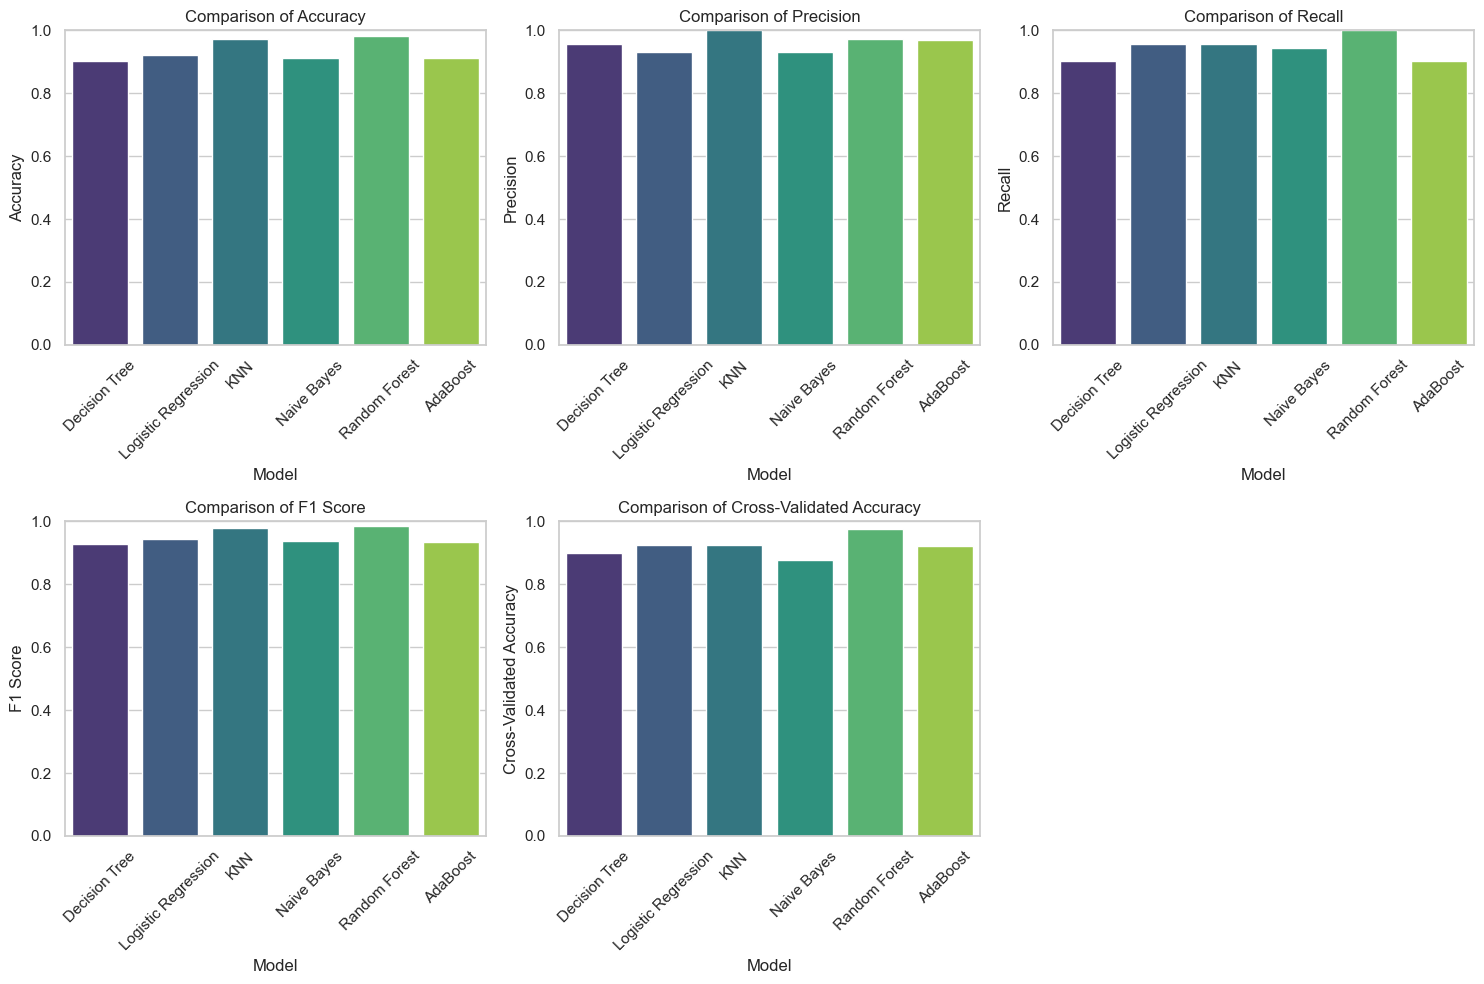

In [ ]:
# Collect metrics for each model
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest', 'AdaBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_ab)
    ],
    'Precision': [
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_ab)
    ],
    'Recall': [
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_ab)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_ab)
    ],
    'Cross-Validated Accuracy': [
        cross_val_score(best_model_dt, X, y, cv=5, scoring='accuracy').mean(),
        cross_val_score(best_model_lr, X, y, cv=5, scoring='accuracy').mean(),
        cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean(),
        cross_val_score(nb, X, y, cv=5, scoring='accuracy').mean(),
        cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean(),
        cross_val_score(ab, X, y, cv=5, scoring='accuracy').mean()
    ]
})

# Display results table
print(results)

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(15, 10))

# Number of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cross-Validated Accuracy']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=results, palette='viridis')
    plt.title(f'Comparison of {metric}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Since metrics range from 0 to 1

plt.tight_layout()
plt.show()



**Justification:**
The detailed comparison of various performance metrics of all the models is depicted in the above graph.
Since precision and recall should be balanced, by looking at f1 score and accuracy and all other values,Random forest is favourable and best from the accuracy point of view for this data set due to its superior accuracy, perfect recall, high precision, balanced F1 score, and strong cross-validated accuracy.
